# @ElonMusk Twitter Scraping, Text Analysis, and NLP Sentiment Classification


## Elon Musk, a prolific figure of our time, who captures national attention for the technological achievements of his companies, tremendous wealth, entrepreneurial grandeur, and his adoration of memes. The goal of this project will be to gain a historical dataset of Elon Musk's twitter account, as of 9/29/2022, and perform a series of text based analysis, as well as sentiment classification. This will be done in order to determine Elon's use of Twitter over time, the frequency of which he Tweets, common themes discussed in his Tweets, and more. Given the nature of Mr. Musk's influence on the zeitgeist of our current era, his Tweets are known to make millionaires over night. His sway over popular cryptocurrency communities, he is credited with elevating the popularity of the little known cryptocurrency that started as a joke, Dogecoin. However, his influence can veer in the opposite direction, by plummeting the value of stocks, crpytocurrencies, and the like, given his leadership stake in public companies, such as Tesla. Issues such as these, have embroiled him in legal battles with the Security and Exchance Commission, all due to his Twitter usage. A figure like no other, I determined it to be an interesting exercise to review the Twitter account of what some refer to as "the cyborg-like man", given his level of seemingly impossible,  commercial, financial, and global success.

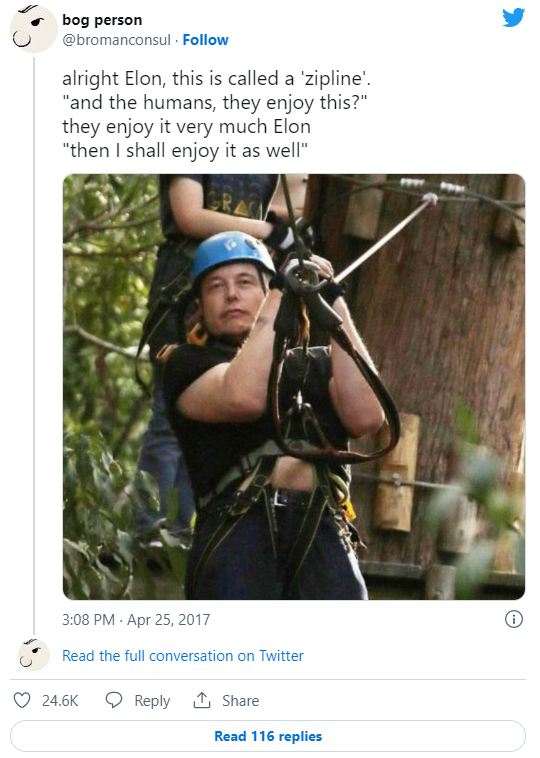

## Twitter Scraping with Snscrape Library


In [1]:
# Importing required libraries
import snscrape.modules.twitter as sntwitter
import os
import pandas as pd
import numpy as np
import re  
# from pandas.io.json import json_normalize - May not be necessary
#pip install wasabi==0.9.1 # Downgrade made at time of project, as dependencies from Wasabi were causing issues with Spacy
import warnings
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style="darkgrid")
import spacy
nlp = spacy.load('en_core_web_lg')



#Set Directory
os.chdir("C:/Users/12108/Desktop/Data Science Projects")
print(os.getcwd())
warnings.filterwarnings("ignore")

C:\Users\12108\anaconda3\envs\Snscraper\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12108\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12108\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\12108\anaconda3\envs\Snscraper\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\12108\Desktop\Data Science Projects


### Here I'll be using the Snscrape library to pull in all historical Tweets, as of 10/21/2022, and then save the Tweets to Pandas dataframe, which I'll then save to my file path. This will allow me to not have to rework this step at a later time and to be able to export the data for sharing to Kaggle.

In [2]:
# Creating list to append tweet data to
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list. Gets all historical Tweets
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:elonmusk').get_items()):
    if i>100000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.user.location, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.lang, tweet.sourceLabel, tweet.user.followersCount, tweet.user.friendsCount, tweet.user.verified ])
    
# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'location', 'reply count', 'retweet count', 'like count', 'language', 'Twitter Access Point', 'Follower Count', ' Friends Count', 'verified'])


In [3]:
# Exporting data to a csv to save information and for publishing at a later date
#tweets_df.to_csv('ElonTweets.csv')
tweets_df = pd.read_csv('ElonTweets.csv')

In [4]:
tweets_df['Text']=tweets_df['Text'].astype('string')

## Data exploration and data clearning

In [5]:
# Review data types of datframe
tweets_df.dtypes

Unnamed: 0                int64
Datetime                 object
Tweet Id                  int64
Text                     string
Username                 object
location                float64
reply count               int64
retweet count             int64
like count                int64
language                 object
Twitter Access Point     object
Follower Count            int64
 Friends Count            int64
verified                   bool
dtype: object

### Here it can be seen below that we've brought in 14 columns that reveal the date/time when tweets were posted, the text inclued in the tweet, the twitter access point, reply count, retweent count, like count, follower count, and friend count.

In [6]:
# Reviewing the data to review csv format produced.
tweets_df.head()

Unnamed: 0                   Datetime             Tweet Id  \
0           0  2022-09-29 20:22:46+00:00  1575581872913907712   
1           1  2022-09-29 15:35:09+00:00  1575509494510993408   
2           2  2022-09-29 15:32:42+00:00  1575508878300618752   
3           3  2022-09-29 15:31:12+00:00  1575508498430820352   
4           4  2022-09-29 15:28:10+00:00  1575507735298207744   

                                                Text  Username  location  \
0                               @MuskUniversity True  elonmusk       NaN   
1  Needs be able to get from Starbase to South Pa...  elonmusk       NaN   
2                     @WholeMarsBlog Off-label use 🤣  elonmusk       NaN   
3  Cybertruck will be waterproof enough to serve ...  elonmusk       NaN   
4  @phibetakitten Submarines use electric motors ...  elonmusk       NaN   

   reply count  retweet count  like count language Twitter Access Point  \
0          377            127        3007       en   Twitter for iPhone   
1         1604           1416       33556       en   Twitter for iPhone   
2          754            492       23482       en   Twitter for iPhone   
3        12870           9732      124276       en   Twitter for iPhone   
4          509            347        8189       en   Twitter for iPhone   

   Follower Count   Friends Count  verified  
0       107414837             122      True  
1       107414837             122      True  
2       107414837             122      True  
3       107414837             122      True  
4       107414837             122      True

In [7]:
# dimensions of dataframe
tweets_df.shape

(17602, 14)

In [8]:
# Review of the "Username" field to ensure data quality and that no other users were pulled in
tweets_df.Username.unique()

array(['elonmusk'], dtype=object)

### By looking at the top and bottom data records, we can see that the first initial tweet recorded by the scraper is from June 4th 2010, while the most recent post on Sep 29, 2022. In total, over that nearly 12 year period, Elon produced 17,601 individual tweets and replies.

In [9]:
tweets_df.tail()

Unnamed: 0                   Datetime            Tweet Id  \
17597       17597  2011-12-03 08:22:07+00:00  142881284019060736   
17598       17598  2011-12-03 08:20:28+00:00  142880871391838208   
17599       17599  2011-12-01 10:29:04+00:00  142188458125963264   
17600       17600  2011-12-01 09:55:11+00:00  142179928203460608   
17601       17601  2010-06-04 18:31:57+00:00         15434727182   

                                                    Text  Username  location  \
17597                  That was a total non sequitur btw  elonmusk       NaN   
17598  Great Voltaire quote, arguably better than Twa...  elonmusk       NaN   
17599  I made the volume on the Model S http://t.co/w...  elonmusk       NaN   
17600  Went to Iceland on Sat to ride bumper cars on ...  elonmusk       NaN   
17601  Please ignore prior tweets, as that was someon...  elonmusk       NaN   

       reply count  retweet count  like count language Twitter Access Point  \
17597           27              9          50       en   Twitter for iPhone   
17598           23             29          50       en   Twitter for iPhone   
17599           29             13          74       en   Twitter Web Client   
17600           33             22         189       en   Twitter Web Client   
17601          967            559        6030       en   Twitter Web Client   

       Follower Count   Friends Count  verified  
17597       107415763             122      True  
17598       107415763             122      True  
17599       107415763             122      True  
17600       107415714             122      True  
17601       107415714             122      True

In [10]:
tweets_df['Datetime']=pd.to_datetime(tweets_df['Datetime'])

In [11]:
# convert datetime column to just date
tweets_df['Date'] = pd.to_datetime(tweets_df['Datetime']).dt.date

In [12]:
# Creating temporary daterame to plot Daily Tweet Counts
daily_tweets = pd.DataFrame(tweets_df.groupby(['Date'])['Text'].nunique().reset_index())
daily_tweets = daily_tweets.rename({'Text': 'Tweet Count'}, axis='columns')
daily_tweets["Month"]= pd.to_datetime(daily_tweets["Date"], dayfirst=False)
daily_tweets["Year"]= daily_tweets["Month"].dt.year
daily_tweets["Month"]= daily_tweets["Month"].dt.month_name()
daily_tweets

Date  Tweet Count      Month  Year
0     2010-06-04            1       June  2010
1     2011-12-01            2   December  2011
2     2011-12-03            2   December  2011
3     2011-12-04            1   December  2011
4     2011-12-21            7   December  2011
...          ...          ...        ...   ...
2522  2022-09-25            3  September  2022
2523  2022-09-26            1  September  2022
2524  2022-09-27           12  September  2022
2525  2022-09-28           12  September  2022
2526  2022-09-29           11  September  2022

[2527 rows x 4 columns]

### By plotting the count of Tweets and Replies by day over time, we're able to see a sense of Elon Musk's Twitter usage over time. It can be seen that since his first tweet in 2010, that he had remained fairly inactive until the end of 2011. From there we can see a continuous increase in frequency over time with a high peak around 2020. After further analysis, we can see that his Tweets and replies were the highest in 2020, with a total count of 3363.

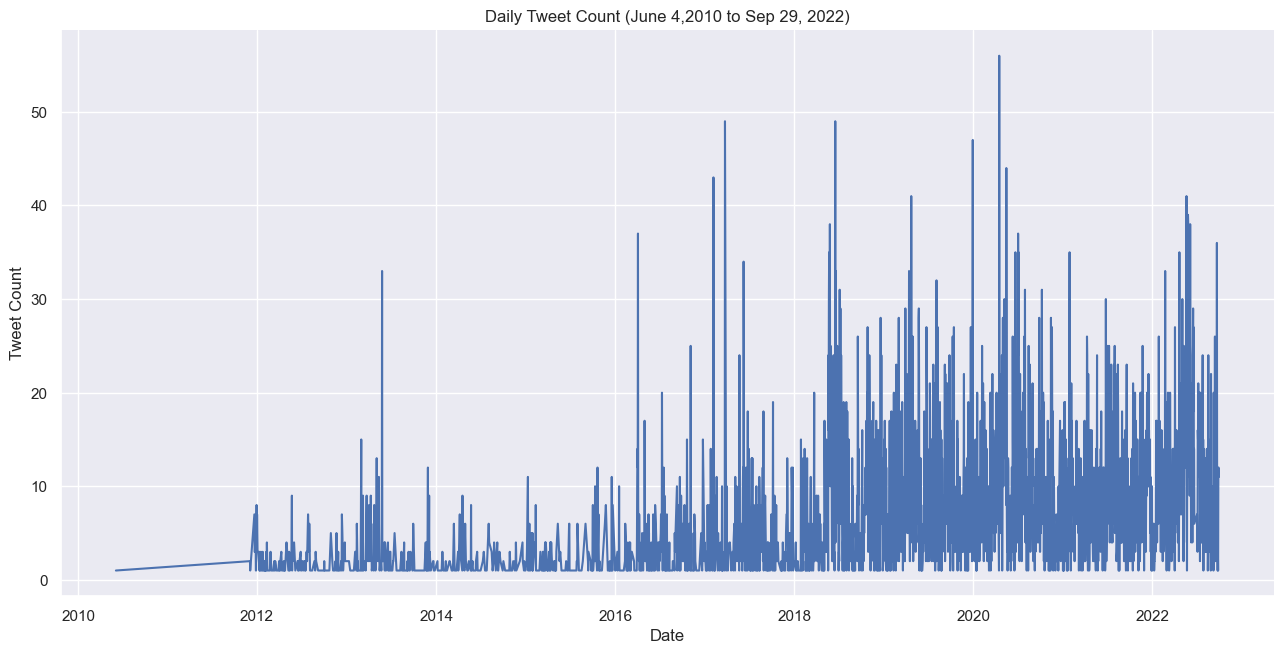

In [13]:
sns.relplot(
    data=daily_tweets, 
    x="Date", y="Tweet Count", 
    kind="line", height=6.5, aspect=2
).set(title="Daily Tweet Count (June 4,2010 to Sep 29, 2022)", ylabel= "Tweet Count")


In [14]:
fig = px.line(data_frame=daily_tweets, x='Date', y='Tweet Count',hover_name="Date",color_discrete_sequence = ['#4169E1'], title="Daily Tweet Count (June 4,2010 to Sep 29, 2022)")
fig.show()

In [15]:
# Reviewing which years had the highest amount of Tweets&Replies
daily_tweets.groupby('Year')[['Tweet Count']].sum()

Tweet Count
Year             
2010            1
2011           42
2012          272
2013          422
2014          188
2015          328
2016          750
2017         1159
2018         2281
2019         2925
2020         3363
2021         3110
2022         2756

### After reviewing some general information about the distribution and timing of tweets over the past few years, I'll then be reviewing the content of the texts to better understand what key themes Elon talks about in his Tweets and replies. It goes without saying that Tesla and other well known topics of conversaton like "Dogecoin" will come up. However, it'll be fascinating to see what other underlying topics may be recurring themes in hs Twitter feed, for which he's less known for.

#### Here an issue below can be seen that the 'mentions' column may have multiple mentions per tweet (e.g. if there's a tweet referencing more than one individual with an '@' symbol, then the 'mentions' column brings in all of those usernames). For simplicity and time, we'll only be considering unique '@' mentions. However, if one was to clean this data for further use, the issue can be handled by expanding the multiple mentions out across multiple columns, so no username occupies an index value with another username. Then one would pivot those multiple columns into a single column for only single mentions of users, for a more accurate analysis.

In [16]:
# Creating temporary daterame to plot counts of @mentions in tweets
review_df =pd.DataFrame()
tweets_df['mentions'] = tweets_df['Text'].apply(lambda x: re.findall('@([\w\-]+):?',x) if len(re.findall('@([\w\-]+):?',x))>0 else '_' )
tweets_df['mentions']=(tweets_df['mentions'].transform(lambda x: ",".join(map(str,x))))
tweets_df['mentions'].value_counts()


_                     4328
WholeMarsBlog          220
teslaownersSV          129
BillyM2k               124
Erdayastronaut         122
                      ... 
TeslaGong,PPathole       1
kenyanwalstreet          1
buzzindelhi              1
redmercy                 1
jonlovett                1
Name: mentions, Length: 8105, dtype: int64

In [17]:
reviewdf=tweets_df[tweets_df.mentions != "_"]
reviewdf=pd.DataFrame(reviewdf.groupby(['mentions'])['Text'].nunique().reset_index())

review_df

Empty DataFrame
Columns: []
Index: []

In [18]:
reviewdf=reviewdf[reviewdf.Text > 10]
reviewdf.sort_values(by =('Text'), ascending=False)


mentions  Text
4187            WholeMarsBlog   205
7496            teslaownersSV   118
1094           Erdayastronaut   114
4990            cleantechnica   106
2729                 PPathole   106
...                       ...   ...
2159             LanceUlanoff    11
4825            boringcompany    11
3865  Teslarati,13ericralph31    11
358            BBCScienceNews    11
643               CathieDWood    11

[88 rows x 2 columns]

### From the analysis below, we can get a sense of which Twitter users Mr.Musk has engaged with more often. We can see below that the user 'WholeMarsBlog' is the most engaged with user based on our assumptions of only looking at tweets with unqiue '@' mentions in them. We can also see is that the Twitter Account WholeMarksBlog, followed by teslaownersSV, Erdayastronaut, PPathole, and others, are among Musks top use mentions.

### Sadly, we can see that the Boring company only received 11 unique mentions.

In [19]:
fig2 = px.bar(reviewdf, x='Text', y='mentions', text_auto='.2s')
fig2.show()


In [20]:
#Cumulative analysis of various words

all_sentences = []

for word in tweets_df['Text']:
    all_sentences.append(word)

all_sentences


lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
        lines.append(w)


print(lines)

['@MuskUniversity', 'True', 'Needs', 'be', 'able', 'to', 'get', 'from', 'Starbase', 'to', 'South', 'Padre', 'Island,', 'which', 'requires', 'crossing', 'the', 'channel', '@WholeMarsBlog', 'Off-label', 'use', '🤣', 'Cybertruck', 'will', 'be', 'waterproof', 'enough', 'to', 'serve', 'briefly', 'as', 'a', 'boat,', 'so', 'it', 'can', 'cross', 'rivers,', 'lakes', '&amp;', 'even', 'seas', 'that', 'aren’t', 'too', 'choppy', '@phibetakitten', 'Submarines', 'use', 'electric', 'motors', 'under', 'water', '…', 'Works', 'on', 'land', 'too', 'As', 'well', 'as', 'advanced', 'chip', '&amp;', 'supercomputer', 'engineers', 'for', 'next-gen', 'training', '&amp;', 'inference', 'Note,', 'this', 'event', 'is', 'meant', 'for', 'recruiting', 'AI', '&amp;', 'robotics', 'engineers,', 'so', 'will', 'be', 'highly', 'technical', 'https://t.co/BcxAEv6qJd', '@stevenmarkryan', 'Pretty', 'much.', 'AI/robotics', 'engineers', 'who', 'understand', 'what', 'problems', 'need', 'to', 'be', 'solved', 'will', 'like', 'what', '

In [21]:
#Function for Cleaning Text columns
def word_clearner(text):
    
    lines=[re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

In [22]:

#Removes Links
lines = [re.sub(r'https?[A-Za-z0-9:/._\-]+','',x) for x in lines]
#Removing Punctuation
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [23]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['muskunivers',
 'true',
 'need',
 'abl',
 'starbas',
 'south',
 'padr',
 'island',
 'requir',
 'cross',
 'channel',
 'wholemarsblog',
 'offlabel',
 'use',
 'cybertruck',
 'waterproof',
 'serv',
 'briefli',
 'boat',
 'cross',
 'river',
 'lake',
 'amp',
 'sea',
 'arent',
 'choppi',
 'phibetakitten',
 'submarin',
 'use',
 'electr',
 'motor',
 'water',
 'work',
 'land',
 'advanc',
 'chip',
 'amp',
 'supercomput',
 'engin',
 'nextgen',
 'train',
 'amp',
 'infer',
 'note',
 'event',
 'meant',
 'recruit',
 'ai',
 'amp',
 'robot',
 'engin',
 'high',
 'technic',
 'stevenmarkryan',
 'pretti',
 'airobot',
 'engin',
 'understand',
 'problem',
 'need',
 'solv',
 'like',
 'wholemarsblog',
 'gfilch',
 'lot',
 'technic',
 'detail',
 'amp',
 'cool',
 'hardwar',
 'demo',
 'gfilch',
 'good',
 'analysi',
 'rate',
 '280',
 'kph',
 '174',
 'mph',
 'wind',
 'starlink',
 'maritim',
 'system',
 'enabl',
 'high',
 'speed',
 'internet',
 'connect',
 'heavi',
 'sea',
 'amp',
 'hurrican',
 'wind',
 'coal',
 'ship

In [25]:
#dist = FreqDist(stem2)

In [26]:
#print(dist)

In [27]:
#stem2=[ i for i in dist if len(i) > 3 and dist[i]>30]

NameError: name 'dist' is not defined

In [28]:
#stem2

['muskunivers',
 'true',
 'need',
 'abl',
 'starbas',
 'south',
 'padr',
 'island',
 'requir',
 'cross',
 'channel',
 'wholemarsblog',
 'offlabel',
 'use',
 'cybertruck',
 'waterproof',
 'serv',
 'briefli',
 'boat',
 'cross',
 'river',
 'lake',
 'amp',
 'sea',
 'arent',
 'choppi',
 'phibetakitten',
 'submarin',
 'use',
 'electr',
 'motor',
 'water',
 'work',
 'land',
 'advanc',
 'chip',
 'amp',
 'supercomput',
 'engin',
 'nextgen',
 'train',
 'amp',
 'infer',
 'note',
 'event',
 'meant',
 'recruit',
 'ai',
 'amp',
 'robot',
 'engin',
 'high',
 'technic',
 'stevenmarkryan',
 'pretti',
 'airobot',
 'engin',
 'understand',
 'problem',
 'need',
 'solv',
 'like',
 'wholemarsblog',
 'gfilch',
 'lot',
 'technic',
 'detail',
 'amp',
 'cool',
 'hardwar',
 'demo',
 'gfilch',
 'good',
 'analysi',
 'rate',
 '280',
 'kph',
 '174',
 'mph',
 'wind',
 'starlink',
 'maritim',
 'system',
 'enabl',
 'high',
 'speed',
 'internet',
 'connect',
 'heavi',
 'sea',
 'amp',
 'hurrican',
 'wind',
 'coal',
 'ship

In [29]:
df1 = pd.DataFrame(stem2, columns=["Words"])

df1

df1['freq'] = df1.groupby('Words')['Words'].transform('count')

df1.sort_values(by =('freq'), ascending=False)

Words  freq
63868             amp  2516
69626             amp  2516
94716             amp  2516
58802             amp  2516
95382             amp  2516
...               ...   ...
124672  danmerriweath     1
124674   circumstanti     1
124677     derektmead     1
56346    brittmayjasp     1
123615     sweenschri     1

[140790 rows x 2 columns]

In [30]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df1:
    freqdoctor[words] += 1

freqdoctor

FreqDist({'Words': 1, 'freq': 1})

In [31]:
df2=df1[df1.freq>50]
df2

Words  freq
1                true   383
2                need   606
3                 abl    75
8              requir   128
11      wholemarsblog   427
...               ...   ...
140782            fun    97
140783          pleas   119
140786          tweet    66
140787         someon    66
140789         actual   312

[72177 rows x 2 columns]

In [32]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [33]:
eg = ''.join(stem2)

In [35]:
#from wordcloud import WordCloud, STOPWORDS
#wordcloud = WordCloud(width = 800, height = 800,
                #background_color ='white',
                #min_font_size = 10).generate(eg)
 
# plot the WordCloud image                      
#plt.figure(figsize = (10, 10), facecolor = None)
#plt.imshow(wordcloud)
#plt.axis("off")
#plt.tight_layout(pad = 0)
 
#plt.show()

## Utilizing Roberta Transformer Model to classify emotions of Tweets

In [36]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax 
import csv
import numpy as np
import urllib.request
import torch

In [37]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)


In [38]:
# Tasks: Classify sentiment as Positive, Negative, or Neutral

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)


# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]


# PT

model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)
tokenizer.save_pretrained(MODEL)



text = "I feel happy"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)


ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[0]]
    #print(l)
    s = scores[ranking[0]]
    #print(s)
    #print(f"{i+1}) {l} {np.round(float(s), 4)}")
    print(l,s)

positive 0.9770638
positive 0.9770638
positive 0.9770638


In [39]:
ranking

array([2, 1, 0], dtype=int64)

In [41]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.7670, -0.2187,  3.6084]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [42]:
def sentiment_classifier(text):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)


    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = labels[ranking[0]]
        #print(l)
        s = scores[ranking[0]]
        #print(s)
        #print(f"{i+1}) {l} {np.round(float(s), 4)}")
        classification = [l,s]
    return classification

### Model Applied to Tweets in order to determine sentiment 

In [43]:
tweets_df['sentiment'] = tweets_df['Text'].apply(lambda x: sentiment_classifier(x[:512]))

In [44]:
tweets_df.head()

Unnamed: 0                  Datetime             Tweet Id  \
0           0 2022-09-29 20:22:46+00:00  1575581872913907712   
1           1 2022-09-29 15:35:09+00:00  1575509494510993408   
2           2 2022-09-29 15:32:42+00:00  1575508878300618752   
3           3 2022-09-29 15:31:12+00:00  1575508498430820352   
4           4 2022-09-29 15:28:10+00:00  1575507735298207744   

                                                Text  Username  location  \
0                               @MuskUniversity True  elonmusk       NaN   
1  Needs be able to get from Starbase to South Pa...  elonmusk       NaN   
2                     @WholeMarsBlog Off-label use 🤣  elonmusk       NaN   
3  Cybertruck will be waterproof enough to serve ...  elonmusk       NaN   
4  @phibetakitten Submarines use electric motors ...  elonmusk       NaN   

   reply count  retweet count  like count language Twitter Access Point  \
0          377            127        3007       en   Twitter for iPhone   
1         1604           1416       33556       en   Twitter for iPhone   
2          754            492       23482       en   Twitter for iPhone   
3        12870           9732      124276       en   Twitter for iPhone   
4          509            347        8189       en   Twitter for iPhone   

   Follower Count   Friends Count  verified        Date        mentions  \
0       107414837             122      True  2022-09-29  MuskUniversity   
1       107414837             122      True  2022-09-29               _   
2       107414837             122      True  2022-09-29   WholeMarsBlog   
3       107414837             122      True  2022-09-29               _   
4       107414837             122      True  2022-09-29   phibetakitten   

               sentiment  
0   [neutral, 0.6005306]  
1   [neutral, 0.8452575]  
2   [neutral, 0.7530303]  
3  [positive, 0.6118259]  
4  [neutral, 0.85970926]

In [45]:
tweets_df['Text'].iloc[542]

'@michaelsiconolf @KirstenGrind @EmilyGlazer Sickonolfi has zero journalistic integrity\nhttps://t.co/gOjDQEOmwJ'

In [46]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [48]:
# Exporting newly created data to a csv to save information for visualization in Tableau/Power BI
#tweets_df.to_csv('ElonTweets(Sentiment).csv')
#tweets_df_(Sentiment) = pd.read_csv('ElonTweets(Sentiment).csv')